In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv(('bikerides_day.csv'), parse_dates = True)
df.Date = pd.to_datetime(df.Date)
df.head()

Date  Volume  Rain  Temp
0 2016-11-17   933.0   9.0   2.1
1 2016-11-18  1197.0   6.7   3.9
2 2016-11-19   243.0   5.4   2.0
3 2016-11-20   234.0   3.9   2.8
4 2016-11-21  2148.0   7.3   2.8

In [3]:
df.corr()

Volume      Rain      Temp
Volume  1.000000 -0.026738  0.572439
Rain   -0.026738  1.000000  0.114399
Temp    0.572439  0.114399  1.000000

In [4]:
df.describe()

Volume         Rain         Temp
count  1273.000000  1273.000000  1273.000000
mean   2609.344855     1.945640     6.783975
std    1968.623825     4.505151     7.726084
min      63.000000     0.000000   -11.400000
25%    1185.000000     0.000000     0.700000
50%    2073.000000     0.000000     5.500000
75%    3801.000000     1.400000    13.400000
max    8679.000000    39.500000    25.900000

In [5]:
plt.figure(figsize = (16,3))
plt.plot(df['Date'],df['Volume'])
plt.gcf().autofmt_xdate()
plt.show()

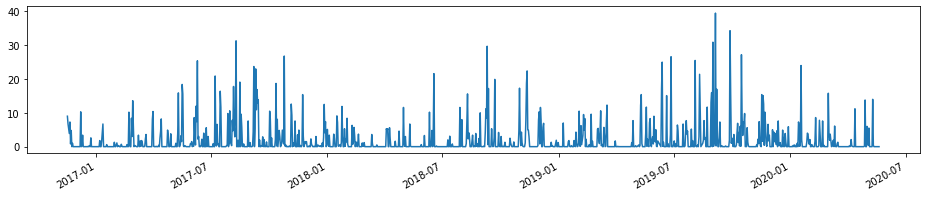

In [6]:
plt.figure(figsize = (16,3))
plt.plot(df['Date'],df['Rain'])
plt.gcf().autofmt_xdate()
plt.show()

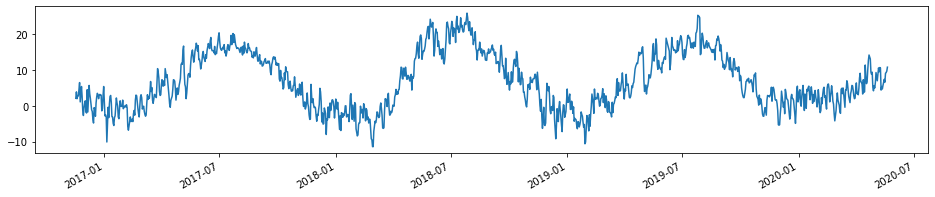

In [7]:
plt.figure(figsize = (16,3))
plt.plot(df['Date'],df['Temp'])
plt.gcf().autofmt_xdate()
plt.show()

In [8]:
df.isna().sum()

Date      0
Volume    0
Rain      0
Temp      0
dtype: int64

In [9]:
def preprocess_data(X, preprocessor=StandardScaler()):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [10]:
dates = df['Date']
PD = preprocess_data(df.iloc[:, 1::])

fig, ax = plt.subplots(3,1)

ax[0].plot(PD['Volume'])
ax[1].plot(PD['Rain'])
ax[2].plot(PD['Temp'])

ax[0].set_title('Volume')
ax[1].set_title('Rain')
ax[2].set_title('Temp')

fig.tight_layout()

/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
i = 1

years = df['Date'].dt.year.tolist()
years = np.unique(years)

Year = []
Month = []
MaxVolume = []
MinVolume = []
MaxRain = []
MinRain = []
MaxTemp = []
MinTemp = []
AvgVolume = []
AvgRain = []
AvgTemp = []


while i <= 12:
    for j in years:
        mask = (df['Date'].dt.month == i) & (df['Date'].dt.year == j)
        df_mask = df.loc[mask]
        Year.append(j)
        Month.append(i)
        MaxVolume.append(df_mask["Volume"].max())
        MinVolume.append(df_mask["Volume"].min())
        AvgVolume.append(df_mask["Volume"].mean())
        MaxRain.append(df_mask["Rain"].max())
        MinRain.append(df_mask["Rain"].min())
        AvgRain.append(df_mask["Rain"].mean())
        MaxTemp.append(df_mask["Temp"].max())
        MinTemp.append(df_mask["Temp"].min())
        AvgTemp.append(df_mask["Temp"].mean())

    i+=1
    
df_stats = pd.DataFrame(list(zip(Year, Month, MaxVolume, MinVolume, AvgVolume,
                                 MaxRain, MinRain, AvgRain,
                                 MaxTemp, MinTemp, AvgTemp)),
                        columns = ['Year', 'Month', 'MaxVolume', 'MinVolume', 'AvgVolume', 
                                   'MaxRain', 'MinRain', 'AvgRain',
                                   'MaxTemp', 'MinTemp', 'AvgTemp'])
df_stats.head()

Year  Month  MaxVolume  MinVolume    AvgVolume  MaxRain  MinRain   AvgRain  \
0  2016      1        NaN        NaN          NaN      NaN      NaN       NaN   
1  2017      1     1956.0      174.0  1202.225806      6.7      0.0  0.522581   
2  2018      1     1878.0      120.0   980.612903     11.9      0.0  1.900000   
3  2019      1     2241.0      114.0  1160.300000      7.0      0.0  0.600000   
4  2020      1     3003.0      294.0  1822.935484     24.0      0.0  1.748387   

   MaxTemp  MinTemp   AvgTemp  
0      NaN      NaN       NaN  
1      2.9    -10.1 -1.448387  
2      3.4     -6.9 -1.722581  
3      4.7    -10.6 -2.943333  
4      5.7     -1.3  2.690323

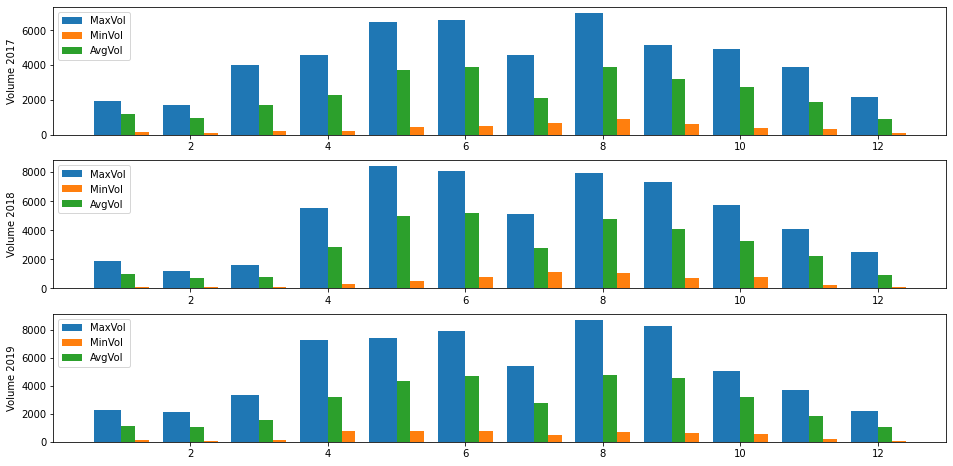

In [12]:
fig, ax = plt.subplots(3,1,figsize = (16,8))


df_stats_2017 = df_stats[df_stats['Year'] == 2017]
df_stats_2018 = df_stats[df_stats['Year'] == 2018]
df_stats_2019 = df_stats[df_stats['Year'] == 2019]

ax[0].bar(df_stats_2017.Month, list(map(float, df_stats_2017.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax[0].bar(df_stats_2017.Month, list(map(float, df_stats_2017.MinVolume)), label='MinVol', align='edge', width=0.4)
ax[0].bar(df_stats_2017.Month, list(map(float, df_stats_2017.AvgVolume)), label='AvgVol', align='edge', width=0.2)

ax[0].set_ylabel("Volume 2017")
ax[0].legend(loc = 'upper left')

ax[1].bar(df_stats_2018.Month, list(map(float, df_stats_2018.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax[1].bar(df_stats_2018.Month, list(map(float, df_stats_2018.MinVolume)), label='MinVol', align='edge', width=0.4)
ax[1].bar(df_stats_2018.Month, list(map(float, df_stats_2018.AvgVolume)), label='AvgVol', align='edge', width=0.2)

ax[1].set_ylabel("Volume 2018")
ax[1].legend(loc = 'upper left')

ax[2].bar(df_stats_2019.Month, list(map(float, df_stats_2019.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax[2].bar(df_stats_2019.Month, list(map(float, df_stats_2019.MinVolume)), label='MinVol', align='edge', width=0.4)
ax[2].bar(df_stats_2019.Month, list(map(float, df_stats_2019.AvgVolume)), label='AvgVol', align='edge', width=0.2)

ax[2].set_ylabel("Volume 2019")
ax[2].legend(loc = 'upper left')


plt.show()

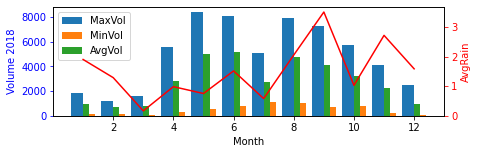

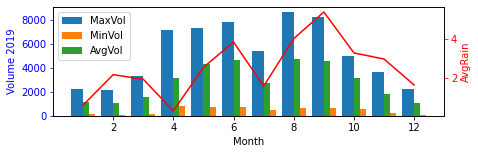

In [13]:
fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2017.Month, df_stats_2017.AvgRain, color='r')
ax2.set_ylabel('AvgRain', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2017")
ax.legend(loc = 'upper left')

plt.show()

fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2018.Month, df_stats_2018.AvgRain, color='r')
ax2.set_ylabel('AvgRain', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2018")
ax.legend(loc = 'upper left')

plt.show()

fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2019.Month, df_stats_2019.AvgRain, color='r')
ax2.set_ylabel('AvgRain', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2019")
ax.legend(loc = 'upper left')

plt.show()

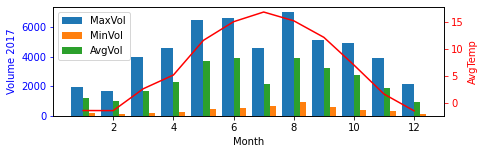

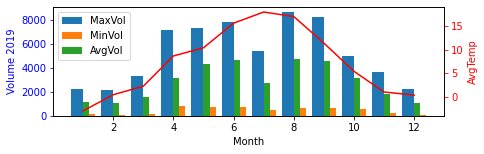

In [14]:
fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2017.Month, list(map(float, df_stats_2017.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2017.Month, df_stats_2017.AvgTemp, color='r')
ax2.set_ylabel('AvgTemp', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2017")
ax.legend(loc = 'upper left')

plt.show()

fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2018.Month, list(map(float, df_stats_2018.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2018.Month, df_stats_2018.AvgTemp, color='r')
ax2.set_ylabel('AvgTemp', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2018")
ax.legend(loc = 'upper left')

plt.show()

fig, ax = plt.subplots(figsize = (7,2))
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.MaxVolume)), label='MaxVol', align='edge', width=-0.4)
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.MinVolume)), label='MinVol', align='edge', width=0.4)
ax.bar(df_stats_2019.Month, list(map(float, df_stats_2019.AvgVolume)), label='AvgVol', align='edge', width=0.2)
ax.set_xlabel('Month')
ax.set_ylabel("Volume", color='b')
ax.tick_params('y', colors='b')

ax2 = ax.twinx()
ax2.plot(df_stats_2019.Month, df_stats_2019.AvgTemp, color='r')
ax2.set_ylabel('AvgTemp', color='r')
ax2.tick_params('y', colors='r')

ax.set_ylabel("Volume 2019")
ax.legend(loc = 'upper left')

plt.show()

In [15]:
df.Date = pd.to_datetime(df.Date)

df['Weekday'] = df.Date.dt.weekday

df.head()

Date  Volume  Rain  Temp  Weekday
0 2016-11-17   933.0   9.0   2.1        3
1 2016-11-18  1197.0   6.7   3.9        4
2 2016-11-19   243.0   5.4   2.0        5
3 2016-11-20   234.0   3.9   2.8        6
4 2016-11-21  2148.0   7.3   2.8        0

In [16]:
df_grouped = df.groupby("Weekday")

In [17]:
pon, wt, śr, czw, pt, sob, nd = [df_grouped.get_group(x) for x in df_grouped.groups]

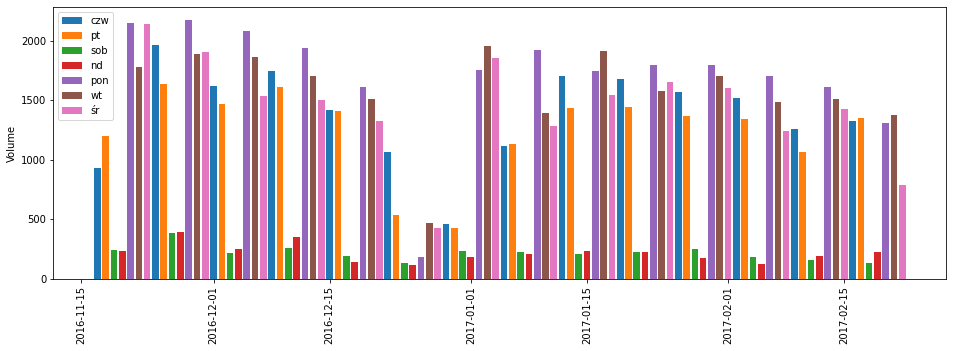

In [18]:
fig, ax = plt.subplots(figsize = (16,5))

ax.bar(czw.Date[:14], czw.Volume[:14], label='czw')
ax.bar(pt.Date[:14], pt.Volume[:14], label='pt')
ax.bar(sob.Date[:14], sob.Volume[:14], label='sob')
ax.bar(nd.Date[:14], nd.Volume[:14], label='nd')
ax.bar(pon.Date[:14], pon.Volume[:14], label='pon')
ax.bar(wt.Date[:14], wt.Volume[:14], label='wt')
ax.bar(śr.Date[:14], śr.Volume[:14], label='śr')

ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel("Volume")
ax.legend()
plt.show()

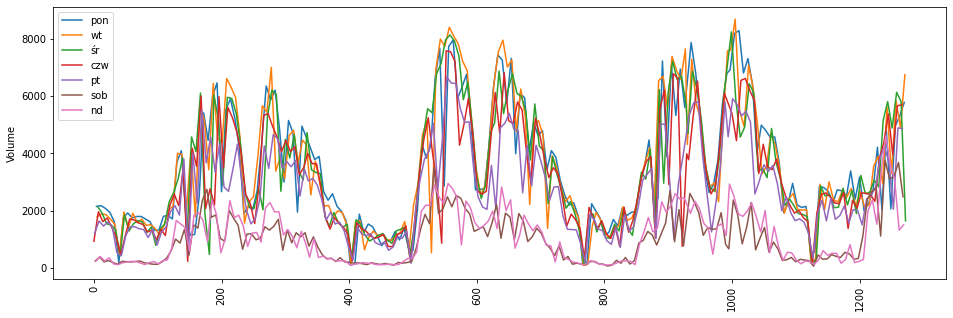

In [19]:
fig, ax = plt.subplots(figsize = (16,5))

pon['Volume'].plot(label='pon')
wt['Volume'].plot(label='wt')
śr['Volume'].plot(label='śr')
czw['Volume'].plot(label='czw')
pt['Volume'].plot(label='pt')
sob['Volume'].plot(label='sob')
nd['Volume'].plot(label='nd')

ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel("Volume")
ax.legend()
plt.show()

In [20]:
print(f"Poniedziałek: min {pon['Volume'].min()}, max {pon['Volume'].max()}, mean {pon['Volume'].mean()}")
print(f"Wtorek: min {wt['Volume'].min()}, max {wt['Volume'].max()}, mean {wt['Volume'].mean()}")
print(f"Środa: min {śr['Volume'].min()}, max {śr['Volume'].max()}, mean {śr['Volume'].mean()}")
print(f"Czwartek: min {czw['Volume'].min()}, max {czw['Volume'].max()}, mean {czw['Volume'].mean()}")
print(f"Piątek: min {pt['Volume'].min()}, max {pt['Volume'].max()}, mean {pt['Volume'].mean()}")
print(f"Sobota: min {sob['Volume'].min()}, max {sob['Volume'].max()}, mean {sob['Volume'].mean()}")
print(f"Niedziela: min {nd['Volume'].min()}, max {nd['Volume'].max()}, mean {nd['Volume'].mean()}")

Poniedziałek: min 105.0, max 8277.0, mean 3478.9666666666667
Wtorek: min 87.0, max 8679.0, mean 3545.5409836065573
Środa: min 138.0, max 8235.0, mean 3355.9945054945056
Czwartek: min 147.0, max 7572.0, mean 3089.1923076923076
Piątek: min 165.0, max 6657.0, mean 2701.8296703296705
Sobota: min 63.0, max 3753.0, mean 1002.6428571428571
Niedziela: min 105.0, max 4623.0, mean 1095.6593406593406


In [21]:
import datetime
date1 = datetime.date(2020, 5, 20) 
date2= datetime.date(2016, 11, 17) 
print(date1 - date2)

1280 days, 0:00:00


In [22]:
df.Date = pd.to_datetime(df.Date)
df['Weekday'] = df.Date.dt.weekday

df.head()

Date  Volume  Rain  Temp  Weekday
0 2016-11-17   933.0   9.0   2.1        3
1 2016-11-18  1197.0   6.7   3.9        4
2 2016-11-19   243.0   5.4   2.0        5
3 2016-11-20   234.0   3.9   2.8        6
4 2016-11-21  2148.0   7.3   2.8        0

In [23]:
df['Weekday'][300:400].plot()

<AxesSubplot:>

In [24]:
df[330:335]#2017-10-16 pon 0

Date  Volume  Rain  Temp  Weekday
330 2017-10-13  3441.0   0.2   7.3        4
331 2017-10-14  1230.0   8.1  10.9        5
332 2017-10-15   843.0   0.0   9.6        6
333 2017-10-17  4296.0   4.8   9.5        1
334 2017-10-18  4722.0   2.9   5.9        2

In [25]:
paz1 = df[326:327]
sty1 = df[780:781]
cze1 = df[925:926]
cze2 = df[926:927]
cze3 = df[927:928]
cze4 = df[928:929]

df.loc[1273,:] = ["2017-10-16", paz1['Volume'], paz1['Rain'], paz1['Temp'], 0]
df.loc[1274,:] = ["2019-01-14", sty1['Volume'], sty1['Rain'], sty1['Temp'], 0]
df.loc[1275,:] = ["2019-06-07", cze1['Volume'], cze1['Rain'], cze1['Temp'], 4]
df.loc[1276,:] = ["2019-06-08", cze2['Volume'], cze2['Rain'], cze2['Temp'], 5]
df.loc[1277,:] = ["2019-06-09", cze3['Volume'], cze3['Rain'], cze3['Temp'], 6]
df.loc[1278,:] = ["2019-06-10", cze4['Volume'], cze4['Rain'], cze4['Temp'], 0]

df.tail(10)

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Date  Volume  Rain  Temp  Weekday
1269  2020-05-17 00:00:00  1509.0   0.0   9.1      6.0
1270  2020-05-18 00:00:00  5775.0   0.0   9.3      0.0
1271  2020-05-19 00:00:00  6741.0   0.0   9.7      1.0
1272  2020-05-20 00:00:00  1647.0   0.0  10.8      2.0
1273           2017-10-16  4947.0   0.0   6.6      0.0
1274           2019-01-14  2241.0   0.0  -1.0      0.0
1275           2019-06-07  2448.0   1.4  12.8      4.0
1276           2019-06-08  5595.0   5.0  13.5      5.0
1277           2019-06-09  7641.0   0.1  13.7      6.0
1278           2019-06-10  5691.0   0.0  13.0      0.0

# Feature Engineering

In [26]:
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df.reset_index()

In [27]:
df['Month'] = df.Date.dt.month
df['Weekday'] = df.Date.dt.weekday

df.drop('index', axis=1, inplace=True)
df['Volume'] = df['Volume'].astype(int)

df.tail(5)

Date  Volume  Rain  Temp  Weekday  Month
1274 2020-05-16    2484   0.0   6.6        5      5
1275 2020-05-17    1509   0.0   9.1        6      5
1276 2020-05-18    5775   0.0   9.3        0      5
1277 2020-05-19    6741   0.0   9.7        1      5
1278 2020-05-20    1647   0.0  10.8        2      5

In [28]:
import holidays
norway_holidays = holidays.Norway(years=[2016,2017,2018,2019,2020])

public_holiday = []

for i in df['Date']:
  i.to_pydatetime()
  if (norway_holidays.get(i) != None) == True:
    public_holiday.append(1)
  else:
    public_holiday.append(0)

df['Public_holiday'] = public_holiday

In [29]:
df.set_index('Date', inplace=True)

df.tail()

Volume  Rain  Temp  Weekday  Month  Public_holiday
Date                                                          
2020-05-16    2484   0.0   6.6        5      5               0
2020-05-17    1509   0.0   9.1        6      5               1
2020-05-18    5775   0.0   9.3        0      5               0
2020-05-19    6741   0.0   9.7        1      5               0
2020-05-20    1647   0.0  10.8        2      5               0

In [30]:
df['Volume_lag_2'] = df['Volume'].shift(2).copy()
df['Volume_lag_3'] = df['Volume'].shift(3).copy()

df['Volume_ma_2'] = df['Volume'].shift(1).rolling(2).mean()
df['Volume_ma_3'] = df['Volume'].shift(1).rolling(3).mean()

df['Volume_std_2'] = df['Volume'].shift(1).rolling(2).std()
df['Volume_std_3'] = df['Volume'].shift(1).rolling(3).std()

df['Volume_max_7'] = df['Volume'].shift(1).rolling(7).max()
df['Volume_min_7'] = df['Volume'].shift(1).rolling(7).min()

df['Volume_median_7'] = df['Volume'].shift(1).rolling(7).median()

df.head(10)

Volume  Rain  Temp  Weekday  Month  Public_holiday  Volume_lag_2  \
Date                                                                           
2016-11-17     933   9.0   2.1        3     11               0           NaN   
2016-11-18    1197   6.7   3.9        4     11               0           NaN   
2016-11-19     243   5.4   2.0        5     11               0         933.0   
2016-11-20     234   3.9   2.8        6     11               0        1197.0   
2016-11-21    2148   7.3   2.8        0     11               0         243.0   
2016-11-22    1782   0.8   4.5        1     11               0         234.0   
2016-11-23    2136   4.8   6.5        2     11               0        2148.0   
2016-11-24    1962   0.0   1.1        3     11               0        1782.0   
2016-11-25    1638   1.0   3.1        4     11               0        2136.0   
2016-11-26     384   0.0   5.4        5     11               0        1962.0   

            Volume_lag_3  Volume_ma_2  Volume_ma_3  Volume_std_2  \
Date                                                               
2016-11-17           NaN          NaN          NaN           NaN   
2016-11-18           NaN          NaN          NaN           NaN   
2016-11-19           NaN       1065.0          NaN    186.676190   
2016-11-20         933.0        720.0        791.0    674.579869   
2016-11-21        1197.0        238.5        558.0      6.363961   
2016-11-22         243.0       1191.0        875.0   1353.402379   
2016-11-23         234.0       1965.0       1388.0    258.801082   
2016-11-24        2148.0       1959.0       2022.0    250.315801   
2016-11-25        1782.0       2049.0       1960.0    123.036580   
2016-11-26        2136.0       1800.0       1912.0    229.102597   

            Volume_std_3  Volume_max_7  Volume_min_7  Volume_median_7  
Date                                                                   
2016-11-17           NaN           NaN           NaN              NaN  
2016-11-18           NaN           NaN           NaN              NaN  
2016-11-19           NaN           NaN           NaN              NaN  
2016-11-20    492.597199           NaN           NaN              NaN  
2016-11-21    553.408529           NaN           NaN              NaN  
2016-11-22   1102.459523           NaN           NaN              NaN  
2016-11-23   1016.009842           NaN           NaN              NaN  
2016-11-24    207.932681        2148.0         234.0           1197.0  
2016-11-25    177.008474        2148.0         234.0           1782.0  
2016-11-26    252.737017        2148.0         234.0           1782.0

In [31]:
df = df.dropna()

# OneHotEncoder

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
for x in df.columns:
  print(x ,':', len(df[x].unique()))

Volume : 921
Rain : 270
Temp : 634
Weekday : 7
Month : 12
Public_holiday : 2
Volume_lag_2 : 920
Volume_lag_3 : 919
Volume_ma_2 : 1082
Volume_ma_3 : 1136
Volume_std_2 : 621
Volume_std_3 : 1256
Volume_max_7 : 344
Volume_min_7 : 207
Volume_median_7 : 409


In [34]:
M = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
M

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [35]:
for label in M:
  df[f'Month_{label}'] = np.where(df['Month']==label,1,0)


In [36]:
D = [0, 1, 2, 3, 4, 5, 6]
D

[0, 1, 2, 3, 4, 5, 6]

In [37]:
for label in D:
  df[f'Weekday_{label}'] = np.where(df['Weekday']==label,1,0)


In [38]:
df.head(3)

Volume  Rain  Temp  Weekday  Month  Public_holiday  Volume_lag_2  \
Date                                                                           
2016-11-24    1962   0.0   1.1        3     11               0        1782.0   
2016-11-25    1638   1.0   3.1        4     11               0        2136.0   
2016-11-26     384   0.0   5.4        5     11               0        1962.0   

            Volume_lag_3  Volume_ma_2  Volume_ma_3  ...  Month_10  Month_11  \
Date                                                ...                       
2016-11-24        2148.0       1959.0       2022.0  ...         0         1   
2016-11-25        1782.0       2049.0       1960.0  ...         0         1   
2016-11-26        2136.0       1800.0       1912.0  ...         0         1   

            Month_12  Weekday_0  Weekday_1  Weekday_2  Weekday_3  Weekday_4  \
Date                                                                          
2016-11-24         0          0          0          0          1          0   
2016-11-25         0          0          0          0          0          1   
2016-11-26         0          0          0          0          0          0   

            Weekday_5  Weekday_6  
Date                              
2016-11-24          0          0  
2016-11-25          0          0  
2016-11-26          1          0  

[3 rows x 34 columns]

In [39]:
df = df.drop(['Weekday'], axis=1)
df = df.drop(['Month'], axis=1)


# Split data

In [40]:
y = df['Volume']
X = df.drop(['Volume'], axis=1)

X = preprocess_data(X)

X_train = X[X.index < '2019-01-01']
X_test = X[X.index >= '2019-01-01'] 
y_train = y[y.index < '2019-01-01']
y_test = y[y.index >= '2019-01-01']

/usr/local/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Gather model scores

In [41]:
model_scores = pd.DataFrame(columns=['model','training_score','mae'])
model_scores

Empty DataFrame
Columns: [model, training_score, mae]
Index: []

In [42]:
prediction_baseline = y.shift(7).copy()
prediction_baseline = prediction_baseline[prediction_baseline.index >= '2019-01-01']

mae = mean_absolute_error(y_test, prediction_baseline)

In [43]:
temp = pd.DataFrame([['PredictionBaseline', 'NaN',mae]],columns=['model','training_score','mae'])
model_scores = model_scores.append(temp, ignore_index=True)

# Linear Regression

In [44]:
parameters = {'copy_X':(True, False), 'n_jobs':[-1, 1]}
linreg = LinearRegression()
clf = GridSearchCV(linreg, parameters)
param = clf.fit(X_train, y_train)
x = list(param.best_params_.values())

In [45]:
model_linreg = LinearRegression(copy_X=x[0], n_jobs=x[1])
model_linreg.fit(X_train, y_train)
training_score = model_linreg.score(X_train, y_train)

In [46]:
pred_linreg = model_linreg.predict(X_test)
mae = mean_absolute_error(y_test, pred_linreg)

temp = pd.DataFrame([['LinearRegression', training_score,mae]],columns=['model','training_score','mae'])
model_scores = model_scores.append(temp, ignore_index=True)
model_scores

model training_score         mae
0  PredictionBaseline            NaN  897.857143
1    LinearRegression       0.855446  645.958203

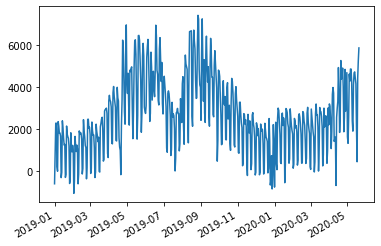

In [47]:
y_pred = model_linreg.predict(X_test)


plt.plot(X_test.index, y_pred)
plt.gcf().autofmt_xdate()

# DecisionTreeRegressor

In [48]:
y = df['Volume']
X = df.drop(['Volume'], axis=1)

X_train = X[X.index < '2019-01-01']
X_test = X[X.index >= '2019-01-01'] 
y_train = y[y.index < '2019-01-01']
y_test = y[y.index >= '2019-01-01']

In [49]:
parameters = {'criterion':('squared_error', 'absolute_error', 'poisson'), 
              'splitter':('best', 'random'),
              'max_features':('auto', 'sqrt', 'log2'),
              'min_samples_split': [2,4,10,20]}
dectree = DecisionTreeRegressor()
clf = GridSearchCV(dectree, parameters)
param_tree = clf.fit(X_train, y_train)
x1 = list(param_tree.best_params_.values())

In [50]:
model_dt = DecisionTreeRegressor(criterion = x1[0], max_features = x1[1], min_samples_split = x1[2], splitter = x1[3])
model_dt.fit(X_train, y_train)

training_score = model_dt.score(X_train, y_train)

In [51]:
pred_dt = model_dt.predict(X_test)
mae = mean_absolute_error(y_test, pred_dt)

temp = pd.DataFrame([['DecisionTreeRegressor', training_score,mae]],columns=['model','training_score','mae'])
model_scores = model_scores.append(temp, ignore_index=True)
model_scores

model training_score         mae
0     PredictionBaseline            NaN  897.857143
1       LinearRegression       0.855446  645.958203
2  DecisionTreeRegressor       0.915789  670.441936

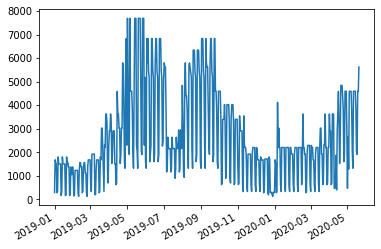

In [52]:
y_pred = model_dt.predict(X_test)


plt.plot(X_test.index, y_pred)
plt.gcf().autofmt_xdate()

# RandomForestRegressor

In [53]:
parameters = {'criterion':('squared_error', 'absolute_error', 'poisson'), 
              'max_features':('auto', 'sqrt', 'log2'),
              'min_samples_split': [2,4,10]}
randomfo = RandomForestRegressor()
clf = GridSearchCV(randomfo, parameters)
param_ranfo = clf.fit(X_train, y_train)
x2 = list(param_ranfo.best_params_.values())

In [54]:
model_rf = RandomForestRegressor(criterion=x2[0], max_features = x2[1], min_samples_split = x2[2])

model_rf.fit(X_train, y_train)
training_score = model_rf.score(X_train, y_train)

In [55]:
pred_rf = model_rf.predict(X_test)
mae = mean_absolute_error(y_test, pred_rf)
temp = pd.DataFrame([['RandomForestRegressor', training_score,mae]],columns=['model','training_score','mae'])
model_scores = model_scores.append(temp, ignore_index=True)
model_scores

model training_score         mae
0     PredictionBaseline            NaN  897.857143
1       LinearRegression       0.855446  645.958203
2  DecisionTreeRegressor       0.915789  670.441936
3  RandomForestRegressor         0.9831  567.039821

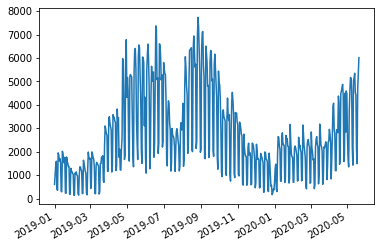

In [56]:
y_pred = model_rf.predict(X_test)


plt.plot(X_test.index, y_pred)
plt.gcf().autofmt_xdate()

# True values (blue) and predicted (orange) on train dataset

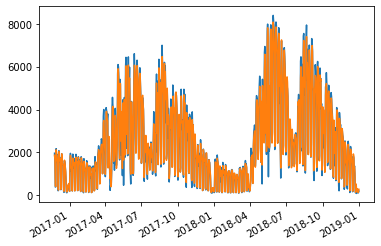

In [57]:
y_pred = model_rf.predict(X_train)

plt.plot(X_train.index, y_train)
plt.plot(X_train.index, y_pred)
plt.gcf().autofmt_xdate()

# True values (blue) and predicted (orange) on test dataset

In [58]:
y_pred = model_rf.predict(X_test)

plt.plot(X_test.index, y_test)
plt.plot(X_test.index, y_pred)
plt.gcf().autofmt_xdate()

# Training set (blue) and predicted values from test set (orange)

In [59]:
import matplotlib.pyplot as plt

plt.plot(X_train.index, y_train)
plt.plot(X_test.index, y_pred)
plt.gcf().autofmt_xdate()

plt.show()

In [60]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))

In [61]:
with open('modeled_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)